# Example of Chrocos application on  different graphs topologies
## Franck Delaplace

In [35]:
import networkx as nx
import matplotlib.pyplot as plt
from tabulate import tabulate
from chrocos import *

## Basic Functions

In [36]:
def printcommunities(P):
    """Print a community.
    :param P: community
    :type P: list[frozenset]
    """
    print(tabulate(P,tablefmt="plain"))

def graphexample(G, position, title, transparency=0.0):
    """Example of ChroCoDe computation on a graph.
    :param G: Networkx graph
    :type G: networkx.Graph
    :param position: Position of the node
    :type position: dict
    :param title: Title of the figure
    :type title: str
    :param transparency: probability of transparent nodes.
    (Defaults: 0.0).
    :type transparency: float
    :returns: Graph Drawing
    :rtype: None
    """

    seeds = GenerateSeeds(G, r)  # generate seeds - they represent the 'corners' of the grid graph.
    RandomColoring(G, seeds, density=0.3, transparency=transparency, color="color")  # color the graph randomly.
    cp = nx.get_node_attributes(G, "color")  # get the color profile.

    P0 = MonochromeCommunityStructure(G, "color")
    plt.subplot(221)
    plt.title(
        title
        + " network: Monochrome community: Hk=%4.2f, Hg=%4.2f"
        % (H(P0, cp, 4, Kappa), H(P0, cp, 4, Gamma))
        )
    DrawColoredGraph(G, pos=position)  # Display the graph

    # RADIUS = 1
    print("radius=1")
    P = ChroCoDe(G, r, radius=1, funenum=Gamma, color="color")

    # print the community structure.
    print("P=")
    printcommunities(P)

    # Display the result
    plt.subplot(223)
    plt.title(
        "radius=1 - Hg="
        + "{:.3e}".format(H(P, cp, 4, Gamma))
        + " - Hk="
        + "{:.3e}".format(H(P, cp, 4, funenum=Kappa))
    )
    DrawChroCoS(G, P, pos=position)  # Display the community structure on the graph

    # RADIUS = 2 (default value)
    print("radius=2")
    P = ChroCoDe(G, r, funenum=Gamma)

    #   print the community structure.
    print("P=")
    printcommunities(P)

    # Display the result
    plt.subplot(224)
    plt.title(
        "radius=2 - Hg="
        + "{:.3e}".format(H(P, cp, 4, Gamma))
        + " - Hk="
        + "{:.3e}".format(H(P, cp, 4, funenum=Kappa))
    )
    DrawChroCoS(G, P, theme="pastel", pos=position)  # Display the community structure on the graph

    # Show
    plt.show()

## Colored Community example

In [37]:
r = 4  # number of colors

### Grid Graph

GRID GRAPH
radius=1
P=
 0   1   2   3   8   9  11  16  17  24  25  32  33  34  35  40  41  42  43  48  56
 4   5   6   7  10  12  13  14  15  18  19  20  21  22  23  26  27  28  29  36  37  38  44  45  46  52
30  31  39  47  49  50  51  53  54  55  57  58  59  60  61  62  63
radius=2
P=
 0   1   2   3   8   9  11  16  17  24  25  32  33  34  35  40  41  42  43  48  56
 4   5   6   7  10  12  13  14  15  18  19  20  21  22  23  26  27  28  29  36  37  38  44  45  46  52
30  31  39  47  49  50  51  53  54  55  57  58  59  60  61  62  63


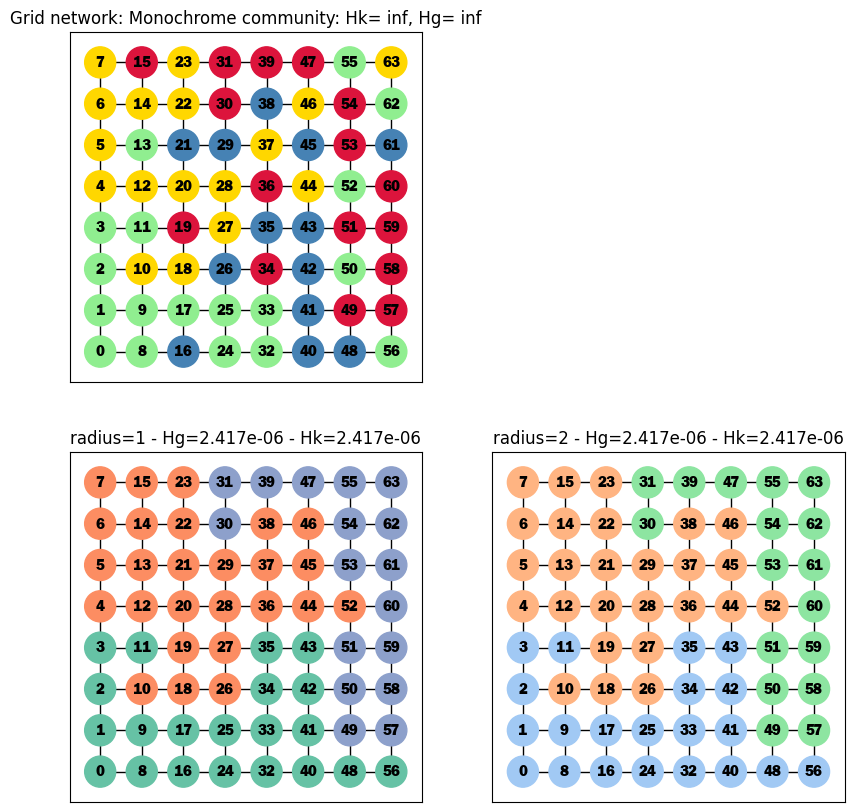

In [38]:
print("GRID GRAPH")
plt.figure(figsize=(10, 10))  # set size of the output graphic view
n = 8
GD = nx.grid_2d_graph(n, n)
G = nx.convert_node_labels_to_integers(GD)  # rename the vertices as integers

gridposition = dict(zip(G, GD))  # define position as label of the initial graph
graphexample(G, gridposition, "Grid")

### Small World

SMALL WORLD
radius=1
P=
 2  34  35   5  38   4   3  13  19  20  23  24  25  26  28  30
 0  33   1  32   6  39   7  27  31
36  37   8   9  10  11  12  14  15  16  17  18  21  22  29
radius=2
P=
 2  34  35   5  38   4   3  13  19  20  23  24  25  26  28  30
 0  33   1  32   6  39   7  27  31
36  37   8   9  10  11  12  14  15  16  17  18  21  22  29


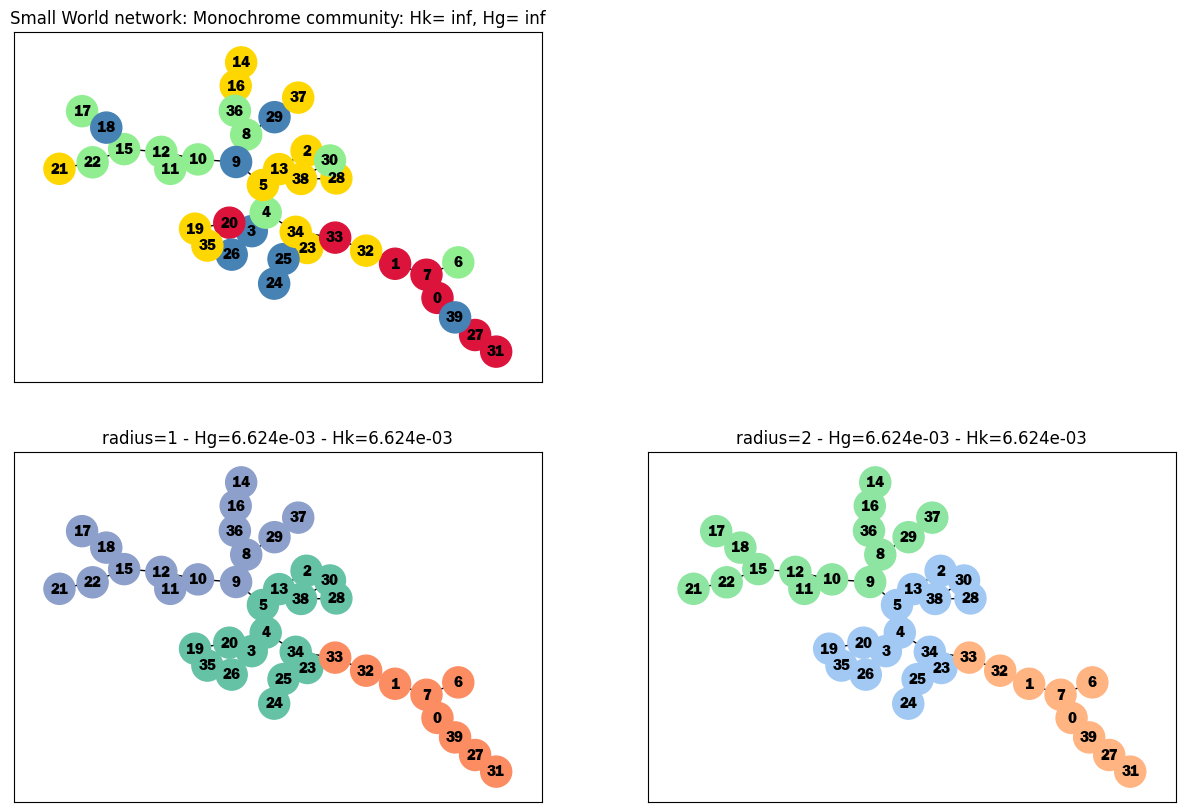

In [49]:
print("SMALL WORLD")
plt.figure(figsize=(15, 10))  # set size of the output graphic view
n = 40
G = nx.connected_watts_strogatz_graph(n, 2, 0.6)

position = nx.kamada_kawai_layout(G)
graphexample(G, position, "Small World")

### Erdos Reny

ERDOS RENY
radius=1
P=
2  3   4   5   8   9  10  11  18  20  23  25  26  27  28  29  30  34  35  37  38  39
6  7  14  16  17  19  21  22  31
0  1  32  33  36  12  13  15  24
radius=2
P=
2  3   4   5   8   9  10  11  18  20  23  25  26  27  28  29  30  34  35  37  38  39
6  7  14  16  17  19  21  22  31
0  1  32  33  36  12  13  15  24


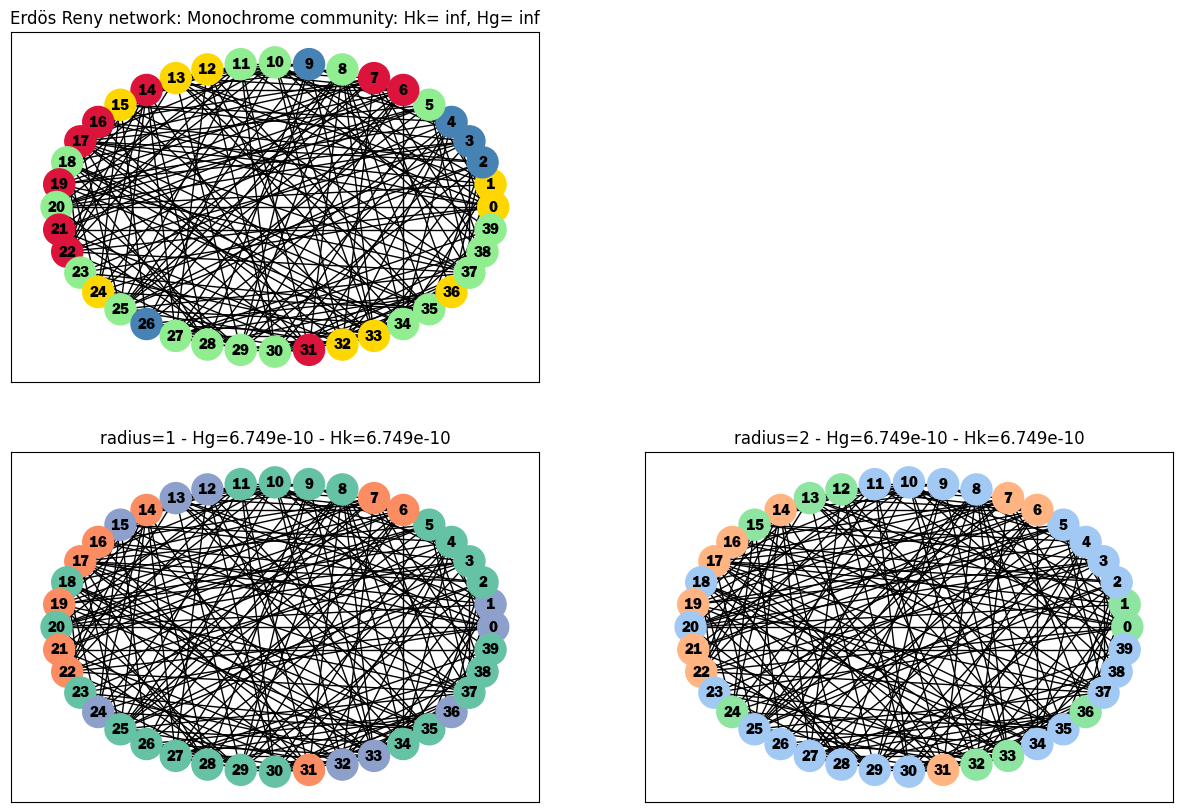

In [51]:
print("ERDOS RENY")
plt.figure(figsize=(15, 10))  # set size of the output graphic view
n = 40
G = nx.erdos_renyi_graph(n, 0.3)

position = nx.circular_layout(G)
graphexample(G, position, "Erdös Reny")

### Scale Free

Scale Free
radius=1
P=
 0  34  38   8  17  20  26  30
32   1   3  36  35   6  39   7   9  10  14  19  22  25  28  29
33   2   4   5  37  11  12  13  15  16  18  21  23  24  27  31
radius=2
P=
 0  34  38   8  17  20  26  30
32   1   3  36  35   6  39   7   9  10  14  19  22  25  28  29
33   2   4   5  37  11  12  13  15  16  18  21  23  24  27  31


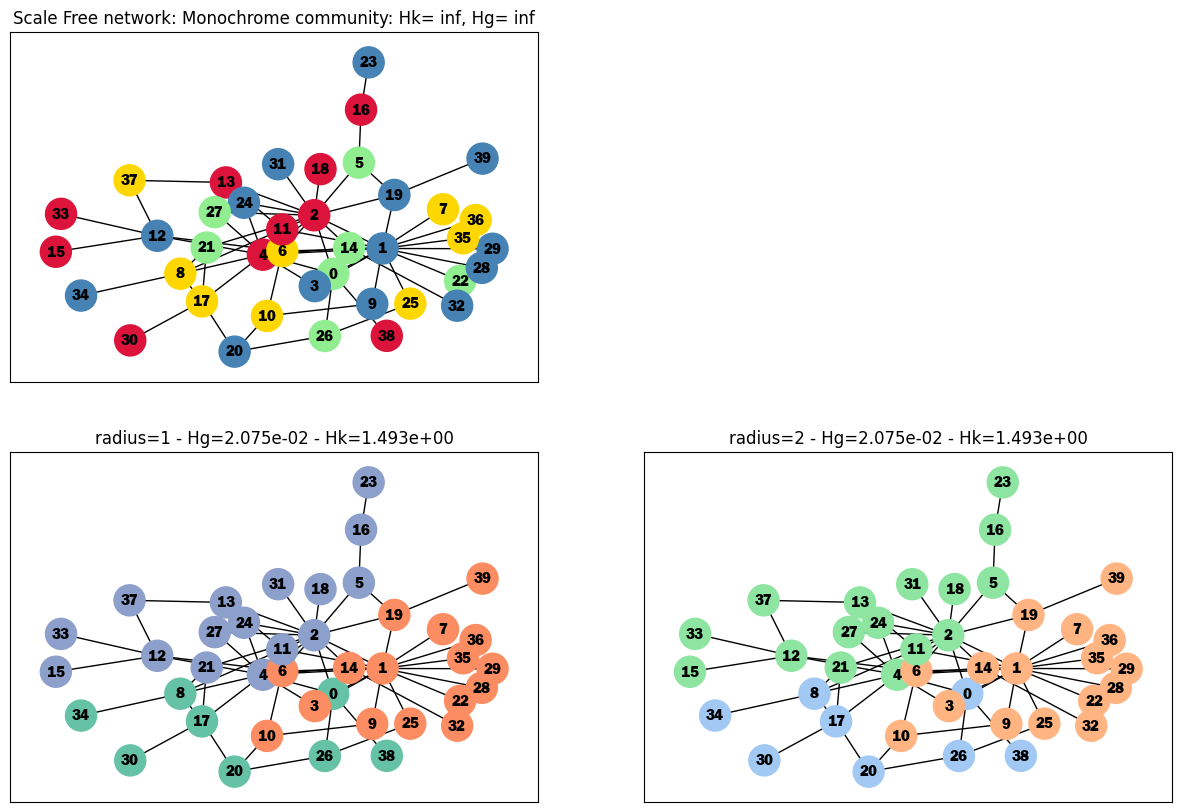

In [52]:
print("Scale Free")
plt.figure(figsize=(15, 10))  # set size of the output graphic view
n = 40
SFG = nx.DiGraph(nx.scale_free_graph(n))
SFG.remove_edges_from(nx.selfloop_edges(SFG))
G = SFG.to_undirected()

position =nx.kamada_kawai_layout(G)
graphexample(G, position, "Scale Free")